In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vw = pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/vw.csv')

In [ ]:
vwc = vw.drop_duplicates(keep = 'first')
vwc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14893 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         14893 non-null  object 
 1   year          14893 non-null  int64  
 2   price         14893 non-null  int64  
 3   transmission  14893 non-null  object 
 4   mileage       14893 non-null  int64  
 5   fuelType      14893 non-null  object 
 6   tax           14893 non-null  int64  
 7   mpg           14893 non-null  float64
 8   engineSize    14893 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
print(vwc.model.unique())

[' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' California' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos'
 ' Fox']


In [ ]:
print(vwc.transmission.unique())
print(vwc.fuelType.unique())

['Automatic' 'Manual' 'Semi-Auto']
['Diesel' 'Petrol' 'Other' 'Hybrid']


In [ ]:
vwc.describe()

,year,price,mileage,tax,mpg,engineSize
count,14893.000000,14893.000000,14893.000000,14893.000000,14893.000000,14893.000000
mean,2017.237561,16807.898073,22202.155845,112.529040,53.772625,1.600483
std,2.054808,7735.548874,21003.362610,63.684422,13.617682,0.460393
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,6000.000000,30.000000,46.300000,1.200000
50%,2017.000000,15494.000000,16558.000000,145.000000,53.300000,1.600000
75%,2019.000000,20995.000000,32000.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [ ]:
vw_model_data = vwc.copy()
vw_model_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [ ]:
vw_model_data = vw_model_data[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
vw_model_data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,T-Roc,2019,Automatic,13904,Diesel,145,49.6,2.0,25000
1,T-Roc,2019,Automatic,4562,Diesel,145,49.6,2.0,26883
2,T-Roc,2019,Manual,7414,Diesel,145,50.4,2.0,20000
3,T-Roc,2019,Automatic,4825,Petrol,145,32.5,2.0,33492
4,T-Roc,2019,Semi-Auto,6500,Petrol,150,39.8,1.5,22900


In [ ]:
vw_data_dummy = pd.get_dummies(vw_model_data)
vw_data_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,13904,145,49.6,2.0,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,2019,4562,145,49.6,2.0,26883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,2019,7414,145,50.4,2.0,20000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,2019,4825,145,32.5,2.0,33492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,2019,6500,150,39.8,1.5,22900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
vw_data_DS = min_max_scaler.fit_transform(vw_data_dummy.drop(columns = ['price']))

In [ ]:
vw_data_DS = pd.DataFrame(vw_data_DS)
vw_data_DS.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.95,0.065580,0.250000,0.262234,0.62500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.95,0.021514,0.250000,0.262234,0.62500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.95,0.034967,0.250000,0.266489,0.62500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.95,0.022755,0.250000,0.171277,0.62500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.95,0.030656,0.258621,0.210106,0.46875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vw_data_dummy.drop(columns = ['price']),
                                                    vw_data_dummy[['price']],
                                                    test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11914, 39)
(11914, 1)
(2979, 39)
(2979, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

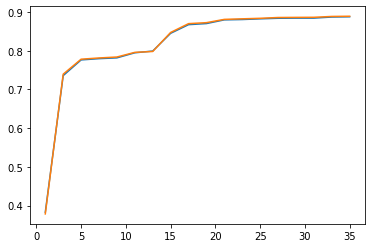

In [ ]:
features = vw_data_dummy.drop(columns = ['price']).columns

N = []                                                                   #NO. OF FEATURES
r_squared_train = []
r_squared_test = []

for k in range(1, 37, 2): 
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k = 23)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ California',
       'model_ Caravelle', 'model_ Polo', 'model_ Sharan', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [ ]:
def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)  
    
    return regressor, score

In [ ]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score},ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.882699
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.741597
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.882603
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.108875
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.947097


In [ ]:
#using polynomials
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(11914, 820)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

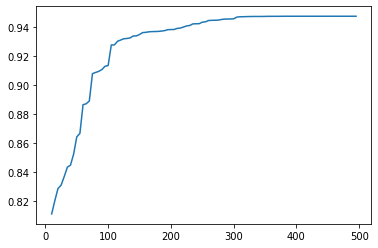

In [ ]:
N = []   #no.of features
r_squared = []

for k in range(10, 500, 5): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
  
sns.lineplot(x = N, y = r_squared)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k =300)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.882699
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.741597
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.882603
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.108875
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.947097
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",-2.485755
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",-230.770759
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.941464
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.048227
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.953417


In [ ]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)
y_pred = RF.predict(X_test_transformed_poly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
y_test = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [ ]:
Comparison = y_test.join(y_pred_df) 
Comparison.head(100)

,price,Price_prediction
0,27990,28700.887
1,12999,14607.066
2,18599,19454.305
3,16850,17752.190
4,6962,7110.584
...,...,...
95,6500,6712.323
96,11290,12796.246
97,8200,7806.521
98,5999,5574.280


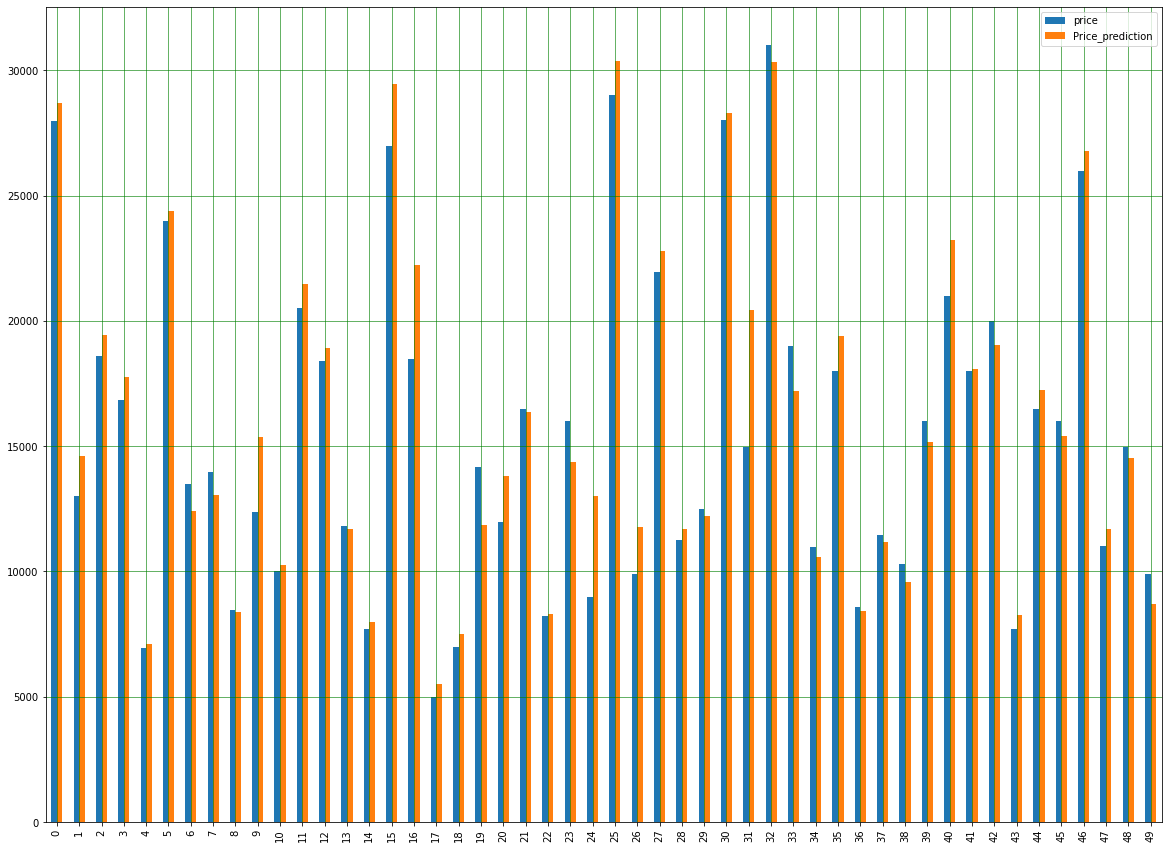

In [ ]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
bmw_pred = plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

XG Boost

In [ ]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
model.fit(X_train,y_train)

[19:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.9570383138313299


In [ ]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,27990,26917.751953
1,12999,15654.486328
2,18599,17065.990234
3,16850,16994.976562
4,6962,7304.756348


In [ ]:
print(y_pred)

[26917.752 15654.486 17065.99  ... 31001.232 10558.237 24577.988]
